In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('bowling.csv')

In [3]:
df.shape

(857, 20)

In [4]:
df.columns

Index(['MatchID', 'InningsNo', 'Team', 'PlayerName', 'Overs', 'Maidens',
       'Runs', 'Wickets', 'Wides', 'NoBalls', 'Economy', 'BowlingOrder',
       'TotalLegalBallsBowled', 'DotBalls', 'Ones', 'Twos', 'Threes', 'Fours',
       'Sixes', 'StrikeRate'],
      dtype='object')

In [5]:
df.dtypes

MatchID                    int64
InningsNo                  int64
Team                      object
PlayerName                object
Overs                    float64
Maidens                    int64
Runs                       int64
Wickets                    int64
Wides                      int64
NoBalls                    int64
Economy                  float64
BowlingOrder               int64
TotalLegalBallsBowled      int64
DotBalls                   int64
Ones                       int64
Twos                       int64
Threes                     int64
Fours                      int64
Sixes                      int64
StrikeRate               float64
dtype: object

In [6]:
df

,MatchID,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
0,1,1,KKR,Umesh Yadav,4.0,0,20,2,2,1,5.00,1,24,15,7,0,0,1,1,12.0
1,1,1,KKR,Shivam Mavi,4.0,0,35,0,1,1,8.75,2,24,12,7,1,0,3,2,0.0
2,1,1,KKR,Varun Chakaravarthy,4.0,0,23,1,1,0,5.75,3,24,11,10,1,0,1,1,24.0
3,1,1,KKR,Sunil Narine,4.0,0,15,0,0,0,3.75,4,24,10,13,1,0,0,0,0.0
4,1,1,KKR,Andre Russell,4.0,0,38,1,0,0,9.50,5,24,7,10,1,0,5,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,76,2,RR,Trent Boult,4.0,1,14,1,2,0,3.50,1,24,17,4,2,0,1,0,24.0
853,76,2,RR,Prasidh Krishna,4.0,0,40,1,2,0,10.00,2,24,13,2,3,0,6,1,24.0
854,76,2,RR,Yuzvendra Chahal,4.0,0,20,1,0,0,5.00,3,24,10,10,3,0,1,0,24.0
855,76,2,RR,Obed McCoy,3.1,0,26,0,0,0,8.21,4,19,5,10,1,0,2,1,0.0


In [ ]:
df.describe(include='all')

Total Number of Players Bowled in IPL 2022

In [7]:
print('Number of PLayers Bowled in IPL 2022 : ',len(df['PlayerName'].unique()))

Number of PLayers Bowled in IPL 2022 :  125


# Individual Performances

First Let us drop unwanted columns by creating a new dataframe df1

In [8]:
df1 = df.drop(['MatchID','BowlingOrder','TotalLegalBallsBowled','StrikeRate'],axis=1)

In [9]:
df1

,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,DotBalls,Ones,Twos,Threes,Fours,Sixes
0,1,KKR,Umesh Yadav,4.0,0,20,2,2,1,5.00,15,7,0,0,1,1
1,1,KKR,Shivam Mavi,4.0,0,35,0,1,1,8.75,12,7,1,0,3,2
2,1,KKR,Varun Chakaravarthy,4.0,0,23,1,1,0,5.75,11,10,1,0,1,1
3,1,KKR,Sunil Narine,4.0,0,15,0,0,0,3.75,10,13,1,0,0,0
4,1,KKR,Andre Russell,4.0,0,38,1,0,0,9.50,7,10,1,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,2,RR,Trent Boult,4.0,1,14,1,2,0,3.50,17,4,2,0,1,0
853,2,RR,Prasidh Krishna,4.0,0,40,1,2,0,10.00,13,2,3,0,6,1
854,2,RR,Yuzvendra Chahal,4.0,0,20,1,0,0,5.00,10,10,3,0,1,0
855,2,RR,Obed McCoy,3.1,0,26,0,0,0,8.21,5,10,1,0,2,1


In [10]:
agg_fun = {'Overs':'sum','Maidens':'sum','Runs':'sum','Wickets':'sum','Wides':'sum','NoBalls':'sum','Economy':'mean','DotBalls':'sum','Ones':'sum','Twos':'sum','Threes':'sum','Fours':'sum','Sixes':'sum'}

In [11]:
df2 = df1.groupby('PlayerName').agg(agg_fun)

df2

,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,DotBalls,Ones,Twos,Threes,Fours,Sixes
PlayerName,,,,,,,,,,,,,
Abdul Samad,1.0,0,8,0,0,0,8.000000,1,4,0,0,1,0
Abhishek Sharma,4.0,0,38,0,0,0,10.500000,4,14,2,0,2,2
Adam Milne,2.3,0,19,0,0,0,7.600000,9,1,2,0,2,1
Aiden Markram,6.0,0,64,1,0,0,10.000000,8,20,0,0,2,6
Akash Deep,18.5,1,205,5,4,2,10.982000,40,33,11,0,15,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wanindu Hasaranga,57.0,1,430,26,4,0,7.703125,143,137,10,0,23,30
Washington Sundar,28.0,0,239,6,1,1,8.698750,47,88,7,0,14,13
Yash Dayal,32.0,0,296,11,10,3,9.305556,76,63,12,0,31,12


Let us have a look at Leading Wicket Takers

In [12]:
df3 = df2.sort_values(by=['Wickets'],ascending=False).iloc[0:10]

In [13]:
df3

,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,DotBalls,Ones,Twos,Threes,Fours,Sixes
PlayerName,,,,,,,,,,,,,
Yuzvendra Chahal,68.0,0,527,27,21,0,7.750000,137,197,19,3,25,27
Wanindu Hasaranga,57.0,1,430,26,4,0,7.703125,143,137,10,0,23,30
Kagiso Rabada,48.0,0,406,23,12,3,8.513077,133,78,21,0,46,15
Umran Malik,49.1,1,444,22,14,4,9.280000,141,70,13,4,54,17
Kuldeep Yadav,49.4,0,419,21,8,0,8.485000,97,137,13,0,29,22
Mohammad Shami,61.0,0,488,20,12,0,8.010625,172,102,20,4,55,17
Josh Hazlewood,46.3,1,377,20,10,0,8.176667,123,87,14,2,36,17
Prasidh Krishna,66.3,3,551,19,30,3,8.285294,200,100,15,1,71,18
Rashid Khan,63.5,0,421,19,3,0,6.594375,127,196,26,2,18,16


Yuzvendra Chahal has took the most number of wickets(27) in IPL 2022.

In [ ]:
plt.figure(figsize=(18,7))
bar = plt.bar(df3.index.values,df3['Wickets'])
plt.bar_label(bar,labels=df3['Wickets'],label_type='edge')
plt.xlabel('PlayerName')
plt.ylabel('Wickets')
plt.title('Leeading Wicket Takers')


In [ ]:
df2.sort_values(by=['Sixes'],ascending=False)

Mohammed Siraj who has bowled 51 Overs has conceded the most number of Sixes(31) in IPL 2022.

In [ ]:
df2.sort_values(by=['Wides'],ascending=False)

Prasidh Krishna who has bowled 66.3 Overs has conceded the most number of Wides(30) in IPL 2022.

In [14]:
df2.sort_values(by=['DotBalls'],ascending=False)

,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,DotBalls,Ones,Twos,Threes,Fours,Sixes
PlayerName,,,,,,,,,,,,,
Prasidh Krishna,66.3,3,551,19,30,3,8.285294,200,100,15,1,71,18
Trent Boult,62.0,3,492,16,15,0,7.927500,176,99,22,2,59,16
Mohammad Shami,61.0,0,488,20,12,0,8.010625,172,102,20,4,55,17
Wanindu Hasaranga,57.0,1,430,26,4,0,7.703125,143,137,10,0,23,30
Umesh Yadav,48.0,2,339,16,4,5,7.062500,143,86,10,2,36,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dewald Brevis,0.3,0,8,1,0,0,16.000000,1,0,0,0,2,0
Nitish Rana,2.0,0,23,0,0,0,11.500000,1,7,0,0,4,0
Abdul Samad,1.0,0,8,0,0,0,8.000000,1,4,0,0,1,0


Also Prasidh krishna has bowled the most Number of DotBalls(200) in IPL 2022

# Innings Wise

In [15]:
df4 = df1[df1['InningsNo']==1]

In [ ]:
df4

In [16]:
df4.drop('InningsNo',axis=1,inplace=True)

C:\Users\bvish\AppData\Local\Temp\ipykernel_8364\945297046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop('InningsNo',axis=1,inplace=True)


In [17]:
df5 = df4.groupby('PlayerName').agg(sum)

In [18]:
df5.sort_values(by=['Wickets'],ascending=False)

,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,DotBalls,Ones,Twos,Threes,Fours,Sixes
PlayerName,,,,,,,,,,,,,
T Natarajan,35.0,0,303,18,11,0,76.58,71,87,16,0,25,12
Jasprit Bumrah,35.0,2,206,15,4,1,52.50,104,68,15,1,20,4
Wanindu Hasaranga,27.0,0,178,14,3,0,47.42,71,65,6,0,12,9
Mohammad Shami,36.0,0,296,13,9,0,74.00,100,61,12,4,31,11
Umran Malik,40.0,1,372,13,10,2,104.92,112,54,13,4,46,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Abhishek Sharma,3.0,0,28,0,0,0,21.50,3,10,2,0,2,1
Simarjeet Singh,2.0,0,21,0,1,0,10.50,6,1,1,1,2,1
Siddarth Kaul,4.0,0,43,0,0,0,10.75,6,11,0,0,5,2


T Natarajan has took 18 wickets, the most by any bowler in first innings in IPL 2022

In [19]:
df6 = df1[df1['InningsNo']==2]


In [20]:
df6

,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,DotBalls,Ones,Twos,Threes,Fours,Sixes
5,2,CSK,Tushar Deshpande,3.0,0,23,0,0,0,7.67,9,3,2,0,4,0
6,2,CSK,Adam Milne,2.3,0,19,0,0,0,7.60,9,1,2,0,2,1
7,2,CSK,Mitchell Santner,4.0,0,31,1,0,0,7.75,5,13,4,0,1,1
8,2,CSK,Dwayne Bravo,4.0,0,20,3,0,0,5.00,11,10,1,0,2,0
9,2,CSK,Shivam Dube,1.0,0,11,0,0,0,11.00,1,3,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,2,RR,Trent Boult,4.0,1,14,1,2,0,3.50,17,4,2,0,1,0
853,2,RR,Prasidh Krishna,4.0,0,40,1,2,0,10.00,13,2,3,0,6,1
854,2,RR,Yuzvendra Chahal,4.0,0,20,1,0,0,5.00,10,10,3,0,1,0
855,2,RR,Obed McCoy,3.1,0,26,0,0,0,8.21,5,10,1,0,2,1


In [21]:
df6.drop('InningsNo',axis=1,inplace=True)

C:\Users\bvish\AppData\Local\Temp\ipykernel_8364\1872867996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop('InningsNo',axis=1,inplace=True)


In [22]:
df6.groupby('PlayerName').agg(sum).sort_values(by=['Wickets'],ascending=False)

,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,DotBalls,Ones,Twos,Threes,Fours,Sixes
PlayerName,,,,,,,,,,,,,
Yuzvendra Chahal,52.0,0,396,21,11,0,99.00,110,142,17,3,20,20
Josh Hazlewood,30.3,0,222,15,7,0,59.37,80,63,9,2,23,6
Prasidh Krishna,50.3,3,414,15,26,1,106.60,154,73,14,1,51,13
Trent Boult,50.0,2,384,14,14,0,99.84,143,83,18,1,45,12
Kagiso Rabada,33.0,0,273,13,5,3,75.42,90,54,16,0,34,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jasprit Bumrah,18.2,0,177,0,2,0,48.57,35,41,7,2,18,7
Rahul Tewatia,4.0,0,41,0,0,0,30.00,6,13,0,0,1,4
Riyan Parag,3.0,0,47,0,2,0,47.00,1,9,2,0,2,4


Y Chahal has took 21 wickets, the most by any bowler in second innings in IPL 2022

# Complete Bowling stats of each Team

In [23]:
aggr_funct = {'Overs':'sum','Maidens':'sum','Runs':'sum','Wickets':'sum','Wides':'sum','NoBalls':'sum','Fours':'sum','Sixes':'sum'}

In [24]:
df_tm = df1.groupby('Team').agg(aggr_funct)

In [25]:
df_tm

,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Fours,Sixes
Team,,,,,,,,
CSK,264.9,1,2211,78,75,6,194,86
DC,277.5,1,2371,86,65,7,207,103
GT,306.6,0,2506,90,55,6,225,101
KKR,271.2,2,2198,76,49,13,178,104
LSG,293.7,5,2448,92,72,6,241,94
MI,268.5,3,2304,82,73,2,200,111
PBSK,260.1,1,2205,77,66,9,201,91
RCB,302.1,6,2570,90,62,6,191,147
RR,331.6,6,2788,97,110,8,249,113


In [26]:
df_tm.insert(0,'Matches Played',[14,14,16,14,15,14,14,16,17,14])

In [27]:
df_tm

,Matches Played,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Fours,Sixes
Team,,,,,,,,,
CSK,14,264.9,1,2211,78,75,6,194,86
DC,14,277.5,1,2371,86,65,7,207,103
GT,16,306.6,0,2506,90,55,6,225,101
KKR,14,271.2,2,2198,76,49,13,178,104
LSG,15,293.7,5,2448,92,72,6,241,94
MI,14,268.5,3,2304,82,73,2,200,111
PBSK,14,260.1,1,2205,77,66,9,201,91
RCB,16,302.1,6,2570,90,62,6,191,147
RR,17,331.6,6,2788,97,110,8,249,113


Text(0.5, 1.0, 'Wickets Took v/s Team')

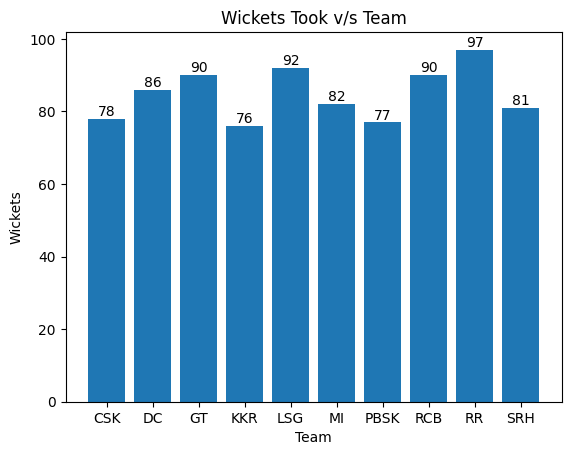

In [28]:
plt.figure()
bar = plt.bar(df_tm.index.values,df_tm['Wickets'])
plt.bar_label(bar,labels=df_tm['Wickets'],label_type='edge')
plt.xlabel('Team')
plt.ylabel('Wickets')
plt.title('Wickets Took v/s Team')

Stats when teams had bowled in first innings

In [29]:
df1[df1['InningsNo']==1].groupby('Team').agg(aggr_funct)

,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Fours,Sixes
Team,,,,,,,,
CSK,80.0,0,686,23,34,2,52,29
DC,180.0,1,1564,50,46,3,143,62
GT,180.0,0,1497,51,33,4,128,63
KKR,178.2,2,1524,46,34,11,118,77
LSG,140.0,1,1214,32,32,3,125,41
MI,176.0,2,1497,59,55,1,129,72
PBSK,99.6,0,784,30,25,3,61,35
RCB,138.5,5,1166,40,20,5,80,74
RR,80.0,1,677,22,25,2,68,26


Stats when teams had bowled in second innings

In [30]:
df1[df1['InningsNo']==2].groupby('Team').agg(aggr_funct)

,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Fours,Sixes
Team,,,,,,,,
CSK,184.9,1,1525,55,41,4,142,57
DC,97.5,0,807,36,19,4,64,41
GT,126.6,0,1009,39,22,2,97,38
KKR,93.0,0,674,30,15,2,60,27
LSG,153.7,4,1234,60,40,3,116,53
MI,92.5,1,807,23,18,1,71,39
PBSK,160.5,1,1421,47,41,6,140,56
RCB,163.6,1,1404,50,42,1,111,73
RR,251.6,5,2111,75,85,6,181,87


Here total number of Overs Bowled were not appropriate in some cases, since I have used the the method count for Overs, this resulted in inappropriate values in few cases